# Advent of Code 2025

This year I will try to move important pieces to python files.

In [361]:
import math
import time
import pandas as pd
from plotnine import *

## Day 1

### Part 1

In [6]:
with open("data/1/input.txt") as f:
    data = f.readlines()
    dial = 50
    zeros = 0
    for rot in data:
        if rot[0] == "R":
            dial += int(rot[1:])
        else:
            dial -= int(rot[1:])
        dial %= 100
        if dial == 0:
            zeros += 1
    print(zeros)

1191


### Part 2

* The dial starts by pointing at 50.
* The dial is rotated L68 to point at 82; during this rotation, it points at 0 once.
* The dial is rotated L30 to point at 52.
* The dial is rotated R48 to point at 0.
* The dial is rotated L5 to point at 95.
* The dial is rotated R60 to point at 55; during this rotation, it points at 0 once.
* The dial is rotated L55 to point at 0.
* The dial is rotated L1 to point at 99.
* The dial is rotated L99 to point at 0.
* The dial is rotated R14 to point at 14.
* The dial is rotated L82 to point at 32; during this rotation, it points at 0 once.

In [112]:
with open("data/1/input.txt") as f:
    data = f.readlines()
    dial = 50
    zeros = 0
    for rot in data:
        rot = rot.strip()
        direction = rot[0]
        count = int(rot[1:])
        if direction == "R":
            dial += count
            zeros += dial // 100
        else:
            pdial = dial
            dial -= count
            if pdial == 0:
                zeros -= 1
            zeros -= dial // 100
        dial %= 100
        if direction == "L" and dial == 0:
            zeros += 1
    print(zeros)

6858


## Day 2

### Part 1

* 11-22 has two invalid IDs, 11 and 22.
* 95-115 has one invalid ID, 99.
* 998-1012 has one invalid ID, 1010.
* 1188511880-1188511890 has one invalid ID, 1188511885.
* 222220-222224 has one invalid ID, 222222.
* 1698522-1698528 contains no invalid IDs.
* 446443-446449 has one invalid ID, 446446.
* 38593856-38593862 has one invalid ID, 38593859.
* The rest of the ranges contain no invalid IDs


In [203]:
with open("data/2/testing.txt") as f:
    data = [[int(a[0]), int(a[1])] for a in [x.split("-") for x in f.read().strip().split(",")]]
    total = 0
    for r in data:
        id = r[0]
        while id <= r[1]:
            digits = 1 + int(math.log(id, 10))
            if digits % 2 == 0:
                first = id // (10 ** (digits // 2))
                second = id % (10 ** (digits // 2))
                if first == second:
                    total += id
            id += 1
    print(total)
    

1227775554


### Part 2

* 11-22 still has two invalid IDs, 11 and 22.
* 95-115 now has two invalid IDs, 99 and 111.
* 998-1012 now has two invalid IDs, 999 and 1010.
* 1188511880-1188511890 still has one invalid ID, 1188511885.
* 222220-222224 still has one invalid ID, 222222.
* 1698522-1698528 still contains no invalid IDs.
* 446443-446449 still has one invalid ID, 446446.
* 38593856-38593862 still has one invalid ID, 38593859.
* 565653-565659 now has one invalid ID, 565656.
* 824824821-824824827 now has one invalid ID, 824824824.
* 2121212118-2121212124 now has one invalid ID, 2121212121.


Small factors
* 10: 1,10 2,5 5,2
* 9: 1,9 3,3
* 8: 1,8 2,4 4,2
* 7: 1,7
* 6: 1,6 2,3 3,2
* 5: 1,5 
* 4: 1,4 2,2
* 3: 1,3
* 2: 1,2

In [204]:
def repeats(id, digits, size, reps):
    first = id // (10 ** (digits - size))
    for i in range(reps - 1):
        id -= first * (10 ** (digits - size))
        digits -= size
        next = id // (10 ** (digits - size))
        if first != next:
            return False
    return True

assert repeats(1212, 4, 2, 2) == True
assert repeats(121212, 6, 2, 3) == True
assert repeats(1234512345, 10, 5, 2) == True
assert repeats(999, 3, 1, 3) == True
assert repeats(998, 3, 1, 3) == False

In [207]:
start = time.time()
with open("data/2/input.txt") as f:
    data = [[int(a[0]), int(a[1])] for a in [x.split("-") for x in f.read().strip().split(",")]]
    total = 0
    for r in data:
        id = r[0]
        while id <= r[1]:
            digits = 1 + int(math.log(id, 10))
            for size in range(1, 6):
                reps = digits // size
                if digits % size == 0 and reps >= 2 and repeats(id, digits, size, reps):
                    total += id
                    break
            id += 1
    print(total)
end = time.time()
print(f"Time = {end - start}")

46270373595
Time = 1.824573040008545


## Day 3

### Part 1

* In 987654321111111, you can make the largest joltage possible, 98, by turning on the first two batteries.
* In 811111111111119, you can make the largest joltage possible by turning on the batteries labeled 8 and 9, producing 89 jolts.
* In 234234234234278, you can make 78 by turning on the last two batteries (marked 7 and 8).
* In 818181911112111, the largest joltage you can produce is 92.

In [242]:
start = time.time()
with open("data/3/testing.txt") as f:
    data = [list(map(int, list(x.strip()))) for x in f.readlines()]
    total = 0
    for bank in data:
        #print(bank)
        last = len(bank) - 1
        first = len(bank) - 2
        for i in range(len(bank) - 3, -1, -1):
            if bank[i] > bank[first]:
                if bank[first] > bank[last]:
                    last = first
                first = i
        #print(first, last)
        print(bank[first] * 10 + bank[last])
        total += bank[first] * 10 + bank[last]
    print(total)
end = time.time()
print(f"Time = {end - start}")

98
89
78
92
357
Time = 0.0016400814056396484


works on test data, not full input

In [307]:
start = time.time()
with open("data/3/testing.txt") as f:
    data = [list(map(int, list(x.strip()))) for x in f.readlines()]
    total = 0
    total2 = 0
    for bank in data:
        first = 0
        last = len(bank) - 1
        for i in range(1, last):
            if bank[i] > bank[first]:
                first = i
        for i in range(last, first, -1):
            if bank[i] > bank[last]:
                last = i
        print(bank)
        print(bank[first] * 10 + bank[last])
        total2 += bank[first] * 10 + bank[last]
        last = len(bank) - 1
        first = len(bank) - 2
        for i in range(len(bank) - 3, -1, -1):
            if bank[i] >= bank[first]:
                if bank[first] >= bank[last]:
                    last = first
                first = i
        #print(first, last)
        print(bank[first] * 10 + bank[last])
        total += bank[first] * 10 + bank[last]
    print(total)
    print(total2)
end = time.time()
print(f"Time = {end - start}")

[9, 8, 7, 6, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1]
98
98
[8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9]
89
89
[2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 7, 8]
78
78
[8, 1, 8, 1, 8, 1, 9, 1, 1, 1, 1, 2, 1, 1, 1]
92
92
357
357
Time = 0.0019609928131103516


In [ ]:
start = time.time()
with open("data/3/input.txt") as f:
    data = [list(map(int, list(x.strip()))) for x in f.readlines()]
    total = 0
    for bank in data:
        last = len(bank) - 1
        first = len(bank) - 2
        for i in range(len(bank) - 3, -1, -1):
            if bank[i] >= bank[first]:
                if bank[first] > bank[last]:
                    last = first
                first = i
        #print(first, last)
        #print(bank[first] * 10 + bank[last])
        total += bank[first] * 10 + bank[last]
    print(total)
end = time.time()
print(f"Time = {end - start}")

this one works, had a typo.

### Part 2

* In 987654321111111, the largest joltage can be found by turning on everything except some 1s at the end to produce 987654321111.
* In the digit sequence 811111111111119, the largest joltage can be found by turning on everything except some 1s, producing 811111111119.
* In 234234234234278, the largest joltage can be found by turning on everything except a 2 battery, a 3 battery, and another 2 battery near the start to produce 434234234278.
* In 818181911112111, the joltage 888911112111 is produced by turning on everything except some 1s near the front.

The total output joltage is now much larger: 987654321111 + 811111111119 + 434234234278 + 888911112111 = 3121910778619.



In [305]:
start = time.time()
NUM = 2
with open("data/3/testing.txt") as f:
    data = [list(map(int, list(x.strip()))) for x in f.readlines()]
    total = 0
    for bank in data:
        print("".join([str(x) for x in bank]))
        flipped = []
        for f in range(NUM):
            flipped.append(len(bank) - NUM + f)
        print(flipped)
        for i in range(len(bank) - (NUM + 1), -1, -1):
            if bank[i] >= bank[flipped[0]]:
                temp = i
                for j in range(len(flipped)):
                    if j == 0 or bank[temp] >= bank[flipped[j]]:
                        saved = flipped[j]
                        flipped[j] = temp
                        temp = saved
                    else:
                        break
                print(flipped)
        val = 0
        for i in range(len(flipped)):
            val += bank[flipped[i]] * 10 ** (len(flipped) - i - 1)
        print(val)
        total += val
    print(total)
end = time.time()
print(f"Time = {end - start}")

987654321111111
[13, 14]
[12, 13]
[11, 12]
[10, 11]
[9, 10]
[8, 9]
[7, 8]
[6, 7]
[5, 6]
[4, 5]
[3, 4]
[2, 3]
[1, 2]
[0, 1]
98
811111111111119
[13, 14]
[12, 14]
[11, 14]
[10, 14]
[9, 14]
[8, 14]
[7, 14]
[6, 14]
[5, 14]
[4, 14]
[3, 14]
[2, 14]
[1, 14]
[0, 14]
89
234234234234278
[13, 14]
78
818181911112111
[13, 14]
[12, 13]
[11, 12]
[6, 11]
92
357
Time = 0.001466989517211914


## Day 4

### Part 1

In [326]:
class Room():

    def __init__(self, floor):
        self.floor = floor
        self.h = len(floor)
        self.w = len(floor[0])

    def adj(self, i, j):
        count = 0
        for x in range(-1, 2):
            for y in range(-1, 2):
                if not (x == 0 and y == 0) and i + x >= 0 and i + x < self.h and j + y >= 0 and j + y < self.w:
                    count += self.floor[i + x][j + y]
        return count

In [327]:
start = time.time()
with open("data/4/input.txt") as f:
    data = [list(map(int, list(x.strip().replace(".", "0").replace("@", "1")))) for x in f.readlines()]
    room = Room(data)
    total = 0
    #print(data)

    for a in range(room.h):
        for b in range(room.w):
            if room.floor[a][b] == 1 and room.adj(a, b) < 4:
                total += 1
                #print(a, b, room.adj(a, b))
    print(total)
end = time.time()
print(f"Time = {end - start}")

1393
Time = 0.02664804458618164


### Part 2

In [364]:
class Room():

    def __init__(self, floor):
        self.floor = floor
        self.h = len(floor)
        self.w = len(floor[0])

    def adj(self, i, j):
        count = 0
        for x in range(-1, 2):
            for y in range(-1, 2):
                if not (x == 0 and y == 0) and i + x >= 0 and i + x < self.h and j + y >= 0 and j + y < self.w:
                    count += self.floor[i + x][j + y]
        return count

    def remove(self, i, j):
        self.floor[i][j] = 0

    def tidy(self):
        x = []
        y = []
        for i in range(self.h):
            for j in range(self.w):
                if self.floor[i][j] == 1:
                    x.append(i)
                    y.append(j)
        d = {'x': x, 'y': y}
        df = pd.DataFrame(data=d)
        return df
        
    def __repr__(self):
        s = ["".join(map(str, x)).replace("0", ".").replace("1", "@") for x in self.floor]
        return "\n".join(s)

In [375]:
start = time.time()
with open("data/4/input.txt") as f:
    data = [list(map(int, list(x.strip().replace(".", "0").replace("@", "1")))) for x in f.readlines()]
    room = Room(data)
    df = room.tidy()
    t = 0
    df["iter"] = t
    #print(room)
    grandtotal = 0
    total = 1
    while total > 0:
        t += 1
        total = 0
    
        queue = []
        for a in range(room.h):
            for b in range(room.w):
                if room.floor[a][b] == 1 and room.adj(a, b) < 4:
                    total += 1
                    queue.append((a, b))
        #print(total)
        for p in queue:
            room.remove(p[0], p[1])
        #print(room)
        mydf = room.tidy()
        mydf["iter"] = t
        df = pd.concat([df, mydf])
        grandtotal += total
    print(grandtotal)
    #print(room)
end = time.time()
print(f"Time = {end - start}")

8643
Time = 0.4074740409851074


In [372]:
df

,x,y,iter
0,0,0,0
1,0,1,0
2,0,3,0
3,0,6,0
4,0,7,0
...,...,...,...
3405,132,21,60
3406,132,95,60
3407,132,96,60
3408,133,19,60


/opt/anaconda3/lib/python3.13/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 6 in image.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: floor2.png


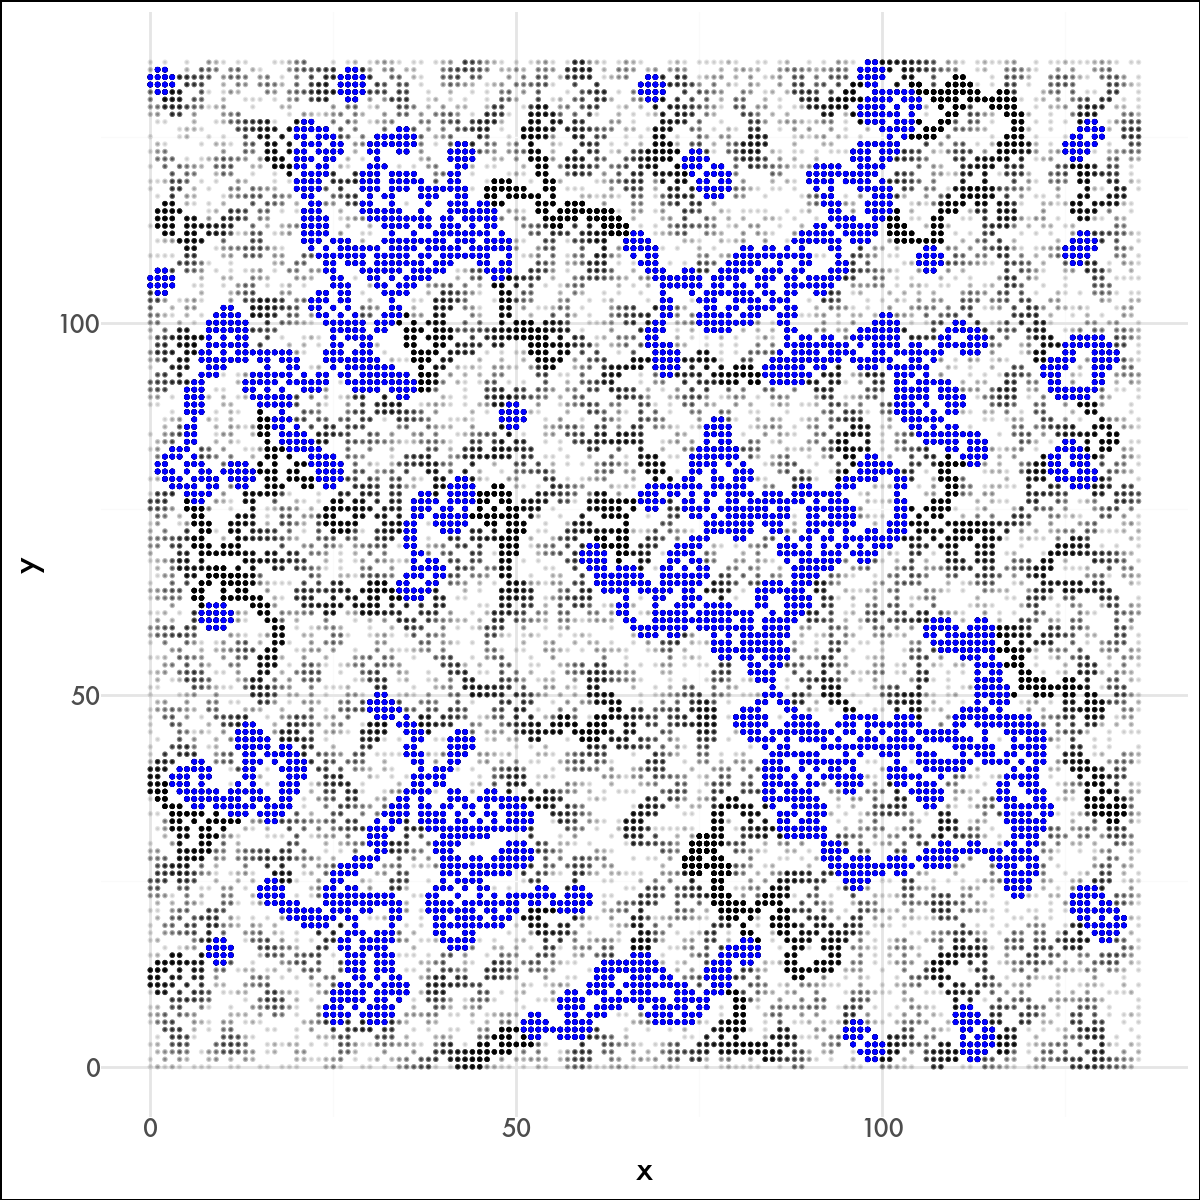

In [393]:
cplot = (ggplot(df, aes("x", "y"))
    + geom_point(size=0.1, alpha=0.1)
    + geom_point(room.tidy(), aes("x", "y"), size=.2, alpha=1, color="blue")
 + theme_minimal(base_family="Futura", base_size=11) 
 + theme(plot_background=element_rect(fill="white"))
 + theme(figure_size=(6, 6)))
cplot.save("floor2.png")
cplot.show()